In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,5) # for the size of the graph height =5  width = 10
plt.rcParams['figure.dpi'] = 300 # for resolution of graph
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel(r"C:\Users\hp\OneDrive\Online retail.xlsx",sheet_name = 'Sheet1')

In [3]:
df.head()

,"shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil"
0,"burgers,meatballs,eggs"
1,chutney
2,"turkey,avocado"
3,"mineral water,milk,energy bar,whole wheat rice..."
4,low fat yogurt


In [4]:
df.isna().sum()

shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil    0
dtype: int64

In [5]:
df_cleaned = df['shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil'].str.split(',')
df_cleaned

0                              [burgers, meatballs, eggs]
1                                               [chutney]
2                                       [turkey, avocado]
3       [mineral water, milk, energy bar, whole wheat ...
4                                        [low fat yogurt]
                              ...                        
7495                    [butter, light mayo, fresh bread]
7496    [burgers, frozen vegetables, eggs, french frie...
7497                                            [chicken]
7498                                [escalope, green tea]
7499    [eggs, frozen smoothie, yogurt cake, low fat y...
Name: shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil, Length: 7500, dtype: object

In [6]:
df_cleaned.drop_duplicates()

0                              [burgers, meatballs, eggs]
1                                               [chutney]
2                                       [turkey, avocado]
3       [mineral water, milk, energy bar, whole wheat ...
4                                        [low fat yogurt]
                              ...                        
7492    [burgers, salmon, pancakes, french fries, froz...
7493    [turkey, burgers, dessert wine, shrimp, pasta,...
7495                    [butter, light mayo, fresh bread]
7496    [burgers, frozen vegetables, eggs, french frie...
7499    [eggs, frozen smoothie, yogurt cake, low fat y...
Name: shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil, Length: 5175, dtype: object

In [7]:
items = sorted(set(item for sublist in df_cleaned for item in sublist))

In [8]:
encoded_data = pd.DataFrame(0, index=df_cleaned.index, columns=items)
encoded_data

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
for idx, transaction in enumerate(df_cleaned):
    for item in transaction:
        encoded_data.at[idx, item] = 1

encoded_data.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
encoded_data.fillna(0, inplace=True)

In [11]:
!pip install mlxtend 

Defaulting to user installation because normal site-packages is not writeable


In [12]:
import mlxtend # importing required library
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder 

In [13]:
from mlxtend.frequent_patterns import apriori, association_rules

# Applying the Apriori algorithm to find frequent itemsets
# Setting a minimum support threshold of 0.01 (1% of the transactions)
frequent_itemsets = apriori(encoded_data, min_support=0.01, use_colnames=True)

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [14]:
num_itemsets = len(frequent_itemsets)  # Number of frequent itemsets
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2,num_itemsets=num_itemsets)

In [15]:
rules_sorted = rules.sort_values(by="lift", ascending=False)

In [16]:
rules_sorted.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
75,(herb & pepper),(ground beef),0.049467,0.098267,0.016000,0.323450,3.291555,1.0,0.011139,1.332841,0.732423,0.121457,0.249723,0.243136
152,"(mineral water, spaghetti)",(ground beef),0.059733,0.098267,0.017067,0.285714,2.907540,1.0,0.011197,1.262427,0.697745,0.121097,0.207875,0.229696
69,(tomatoes),(frozen vegetables),0.068400,0.095333,0.016133,0.235867,2.474134,1.0,0.009613,1.183913,0.639564,0.109304,0.155344,0.202549
67,(shrimp),(frozen vegetables),0.071333,0.095333,0.016667,0.233645,2.450820,1.0,0.009866,1.180480,0.637444,0.111111,0.152887,0.204235
144,"(mineral water, milk)",(frozen vegetables),0.048000,0.095333,0.011067,0.230556,2.418415,1.0,0.006491,1.175740,0.616078,0.083669,0.149472,0.173320
153,"(mineral water, ground beef)",(spaghetti),0.040933,0.174133,0.017067,0.416938,2.394361,1.0,0.009939,1.416431,0.607207,0.086195,0.294000,0.257474
143,"(mineral water, frozen vegetables)",(milk),0.035733,0.129600,0.011067,0.309701,2.389672,1.0,0.006436,1.260904,0.603083,0.071737,0.206918,0.197546
150,"(mineral water, milk)",(ground beef),0.048000,0.098267,0.011067,0.230556,2.346223,1.0,0.006350,1.171928,0.602713,0.081854,0.146705,0.171587
90,(soup),(milk),0.050533,0.129600,0.015200,0.300792,2.320923,1.0,0.008651,1.244836,0.599428,0.092158,0.196681,0.209038
79,(spaghetti),(ground beef),0.174133,0.098267,0.039200,0.225115,2.290857,1.0,0.022088,1.163699,0.682292,0.168096,0.140672,0.312015


In [18]:
from mlxtend.frequent_patterns import apriori, association_rules

# Define a range of thresholds
support_values = [0.01, 0.02, 0.05, 0.1]
confidence_values = [0.2, 0.4, 0.6, 0.8]

results = []

for support in support_values:
    # Generate frequent itemsets for the given support
    frequent_itemsets = apriori(encoded_data, min_support=support, use_colnames=True)
    
    for confidence in confidence_values:
        # Generate association rules for the given confidence
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence,num_itemsets=num_itemsets)
        results.append({'support': support, 'confidence': confidence, 'rules': len(rules)})


C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\mlxtend\frequent_patterns\fpcomm

In [19]:
results_df = pd.DataFrame(results)

AttributeError: 'numpy.float64' object has no attribute 'startswith'

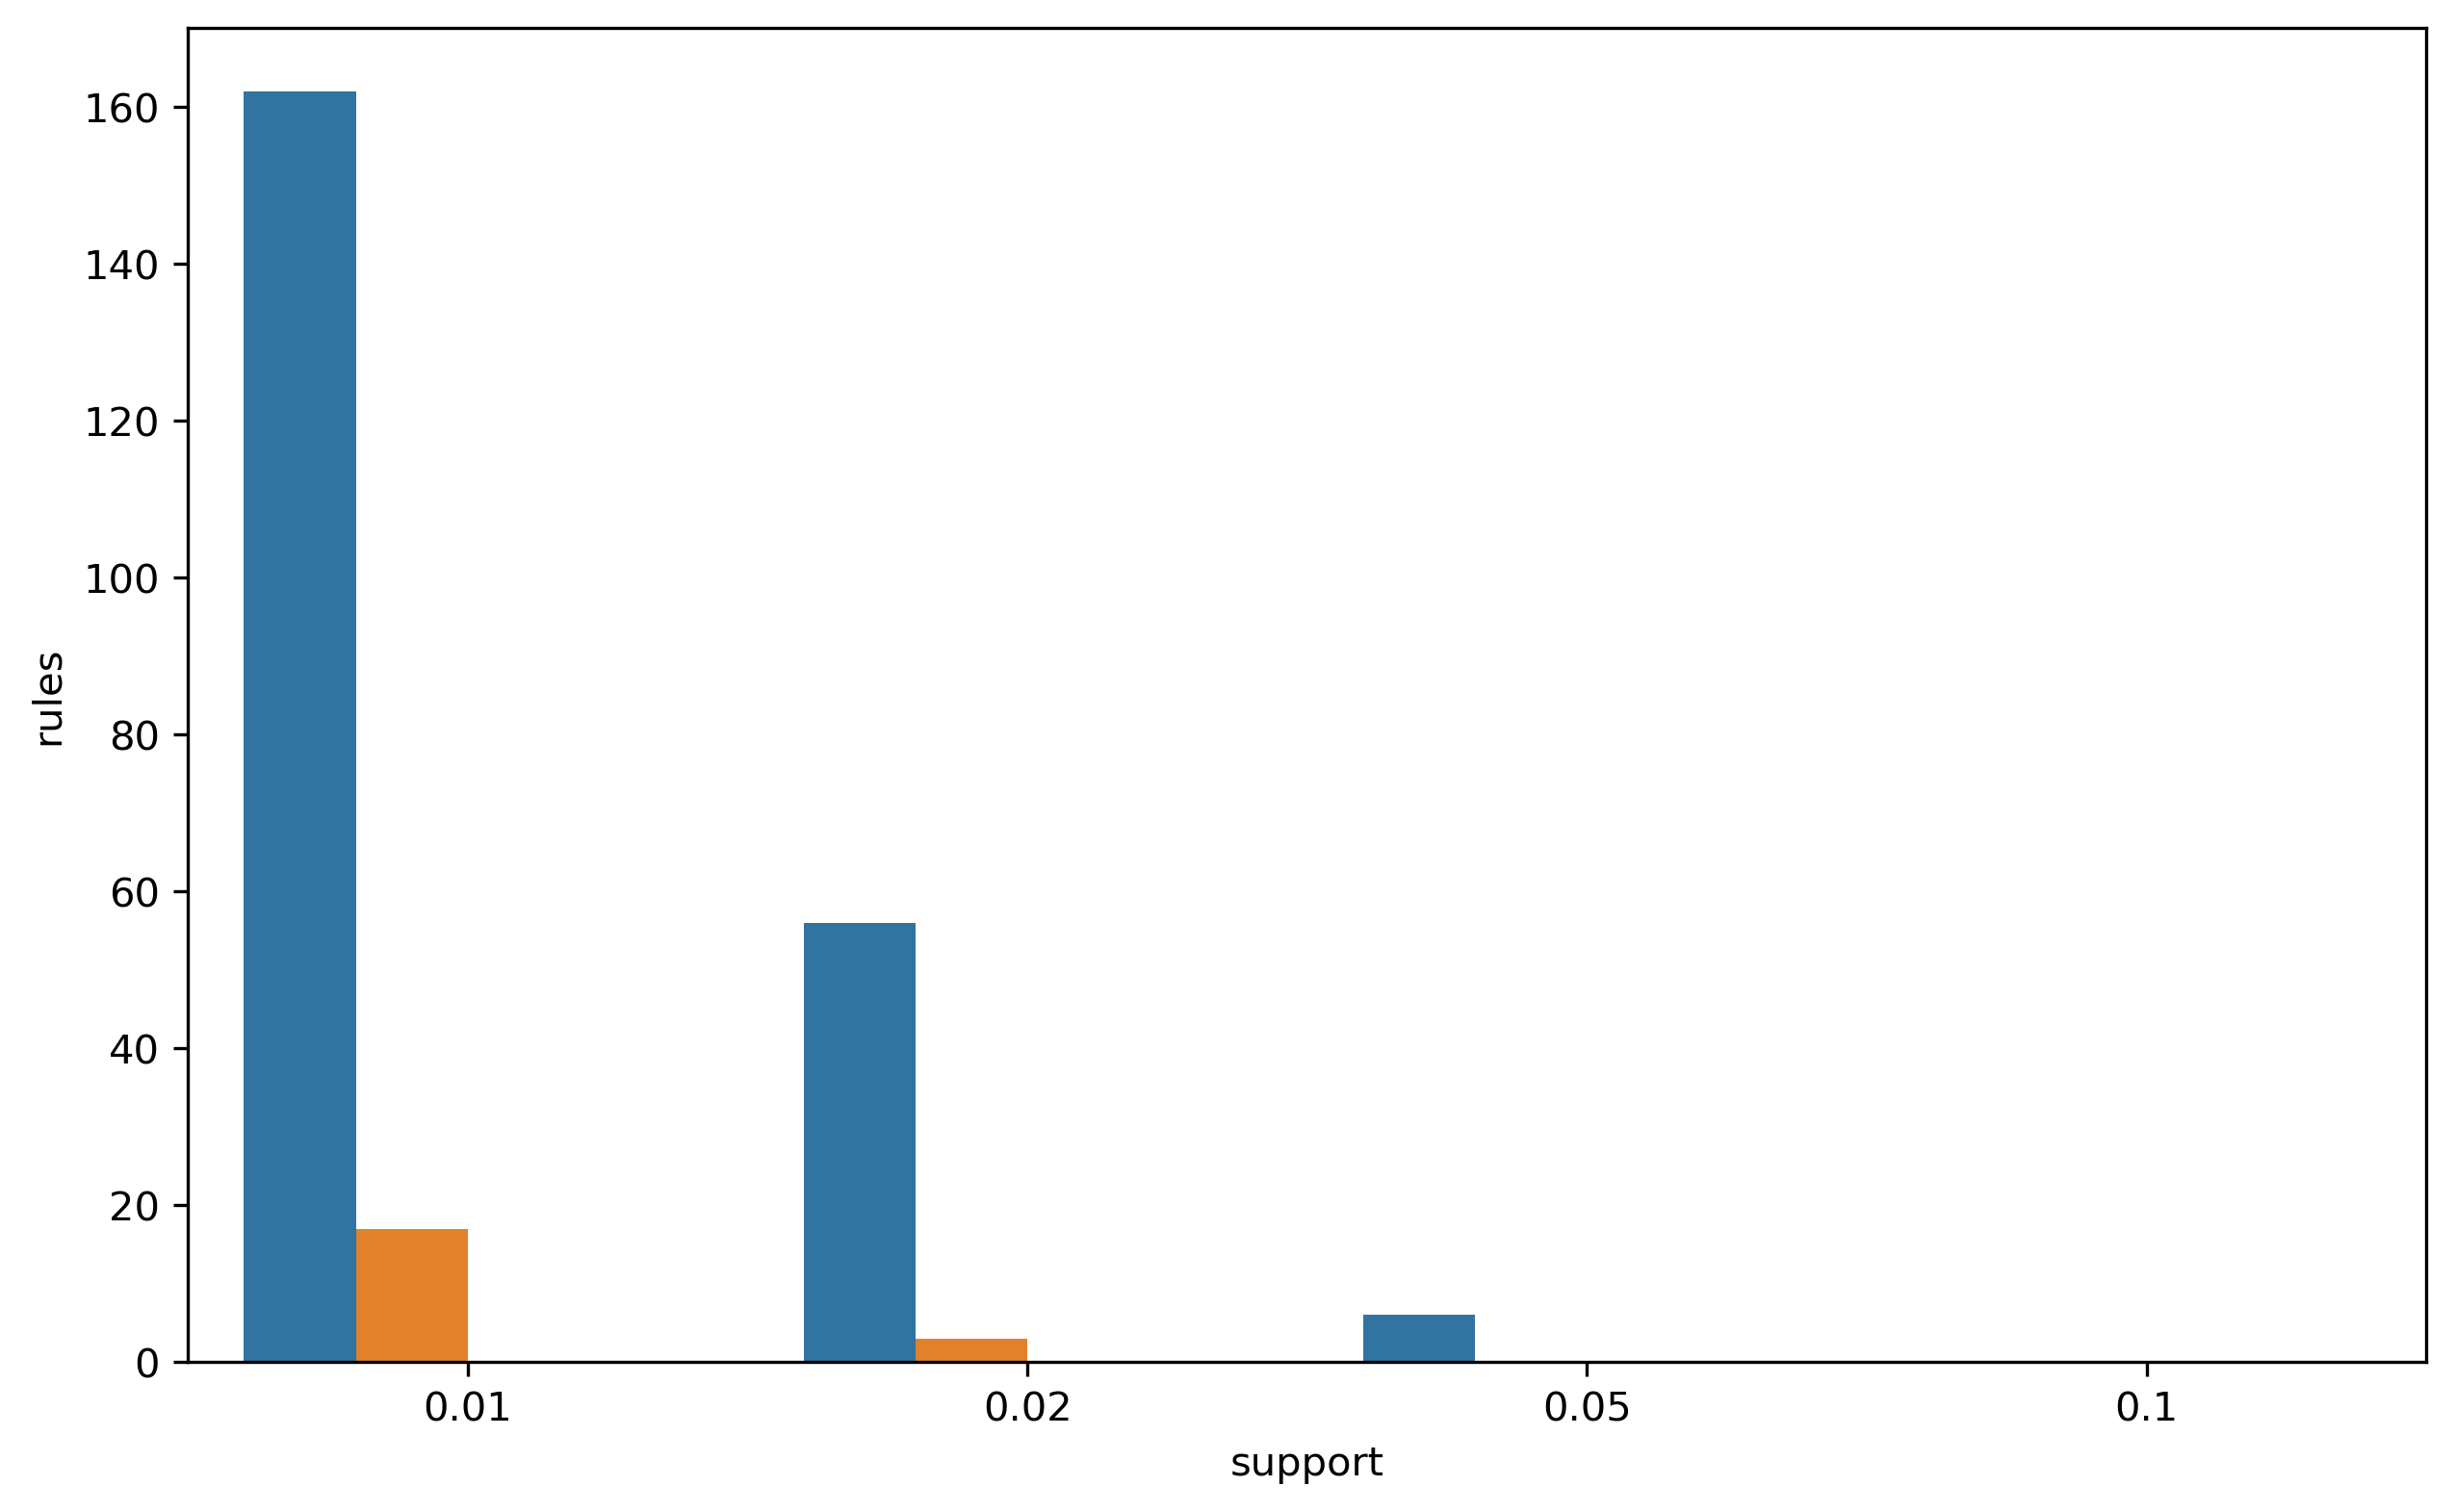

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='support', y='rules', hue='confidence')
plt.title('Number of Association Rules vs Support and Confidence')
plt.xlabel('Support Threshold')
plt.ylabel('Number of Rules')
plt.legend(title='Confidence')
plt.show()


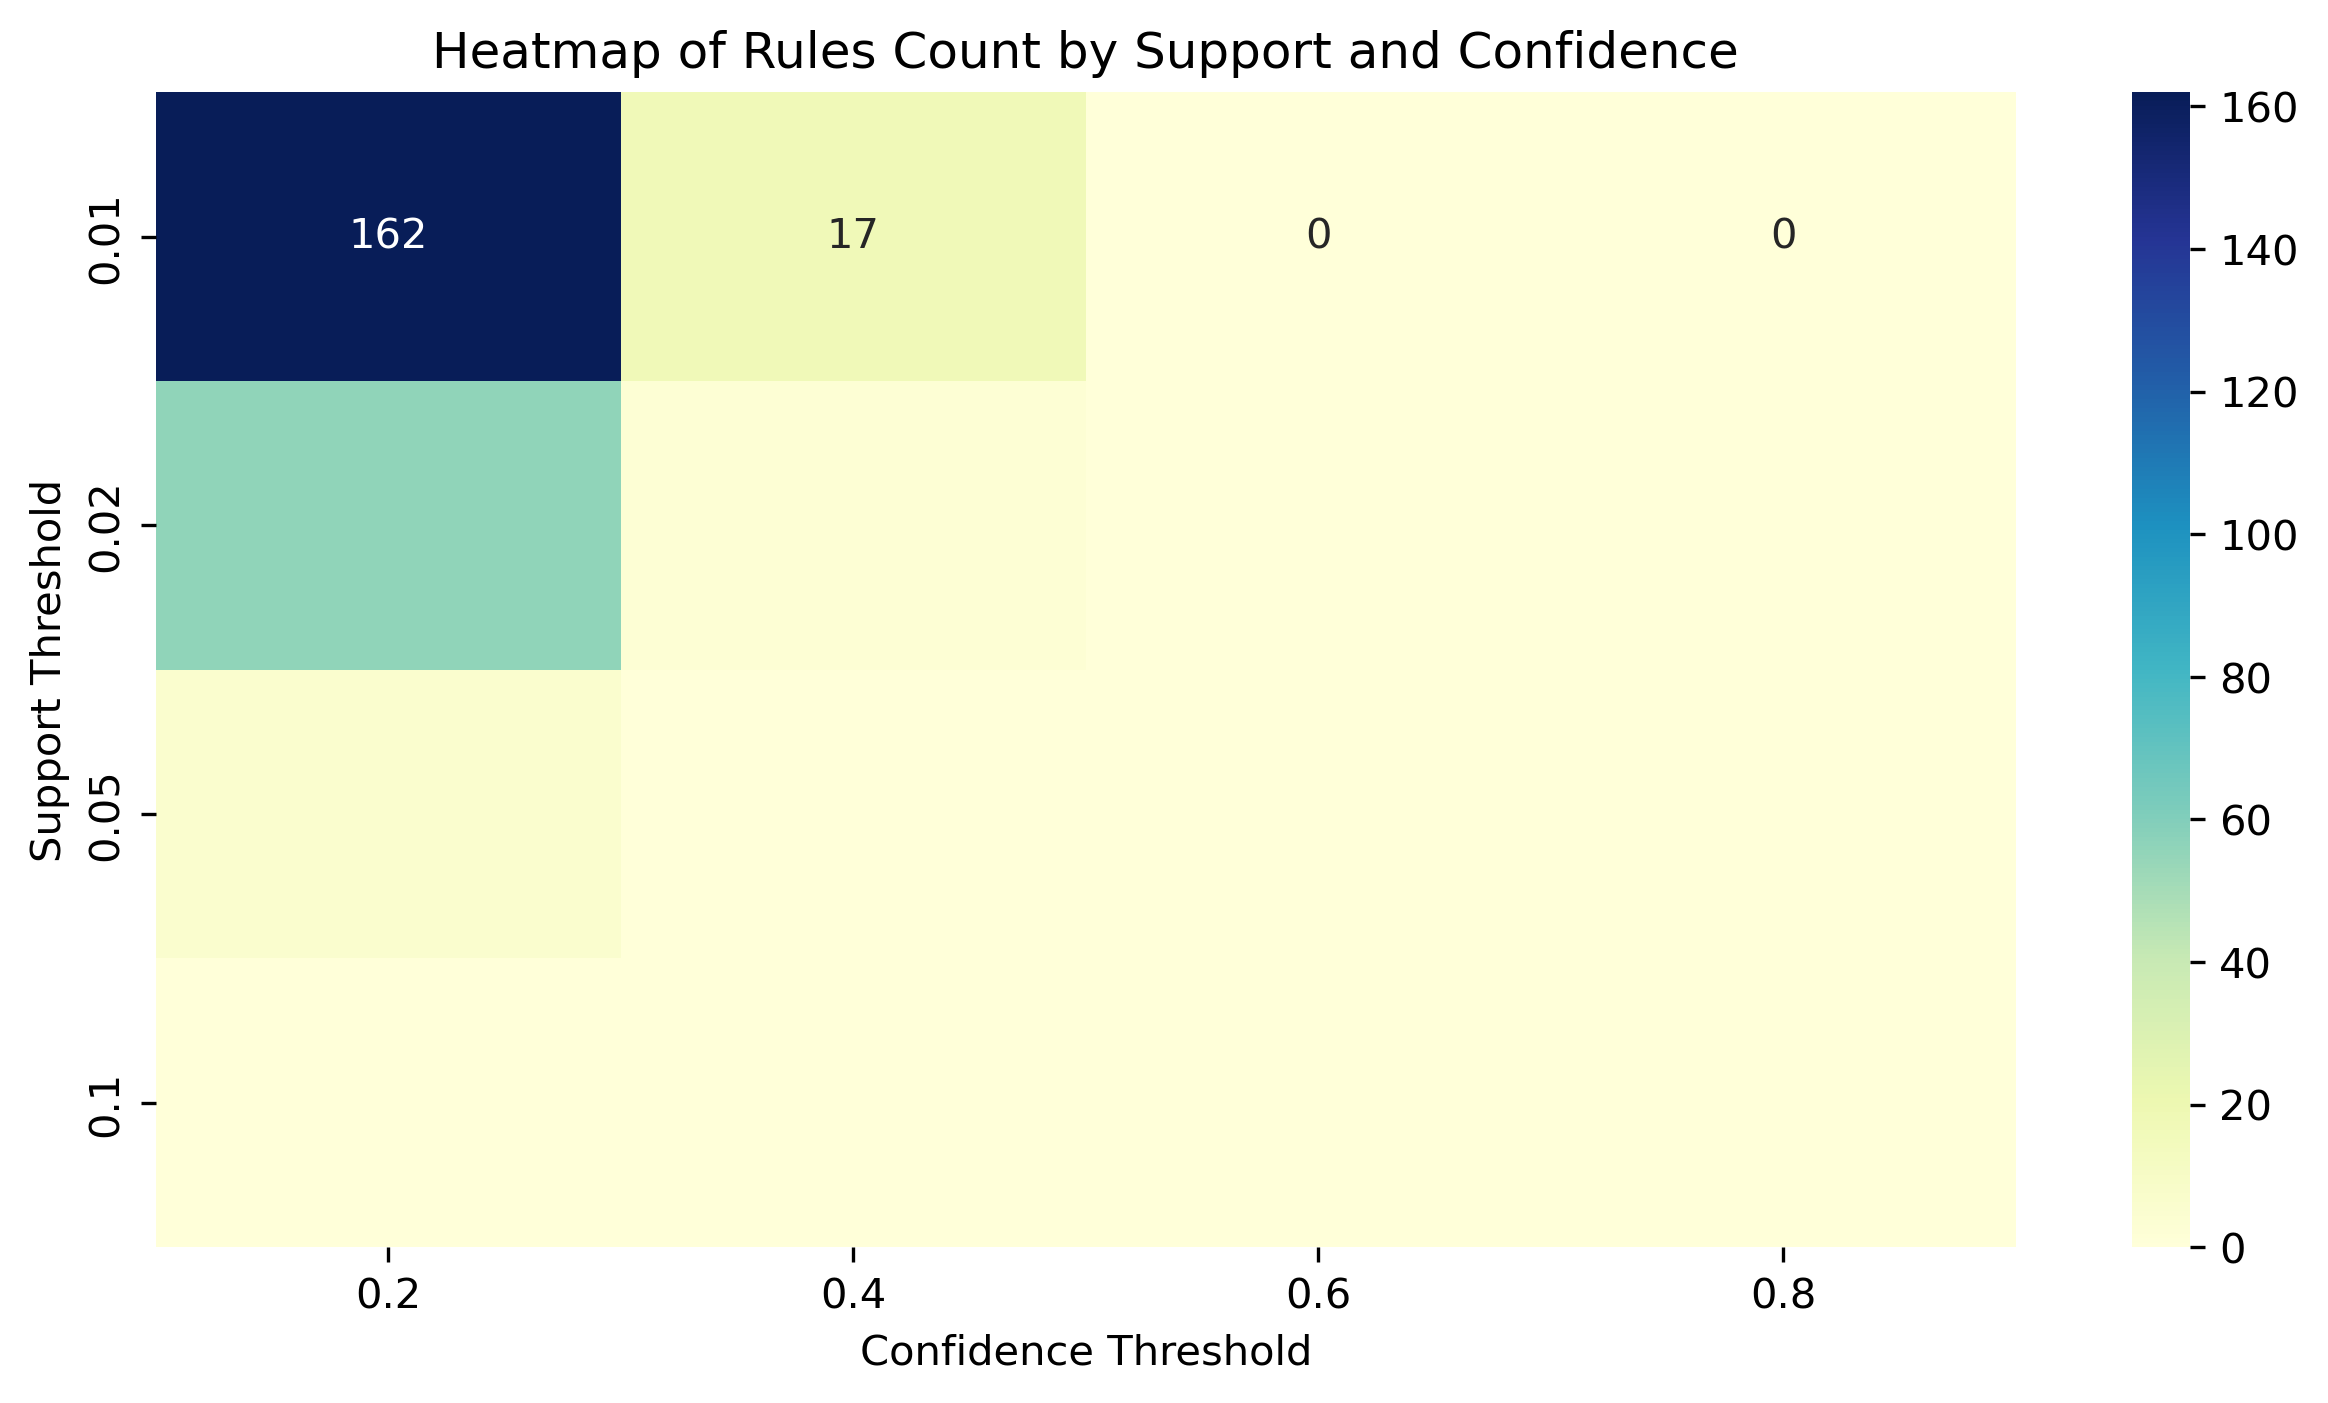

In [22]:
heatmap_data = results_df.pivot('support', 'confidence', 'rules')
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap='YlGnBu')
plt.title('Heatmap of Rules Count by Support and Confidence')
plt.xlabel('Confidence Threshold')
plt.ylabel('Support Threshold')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


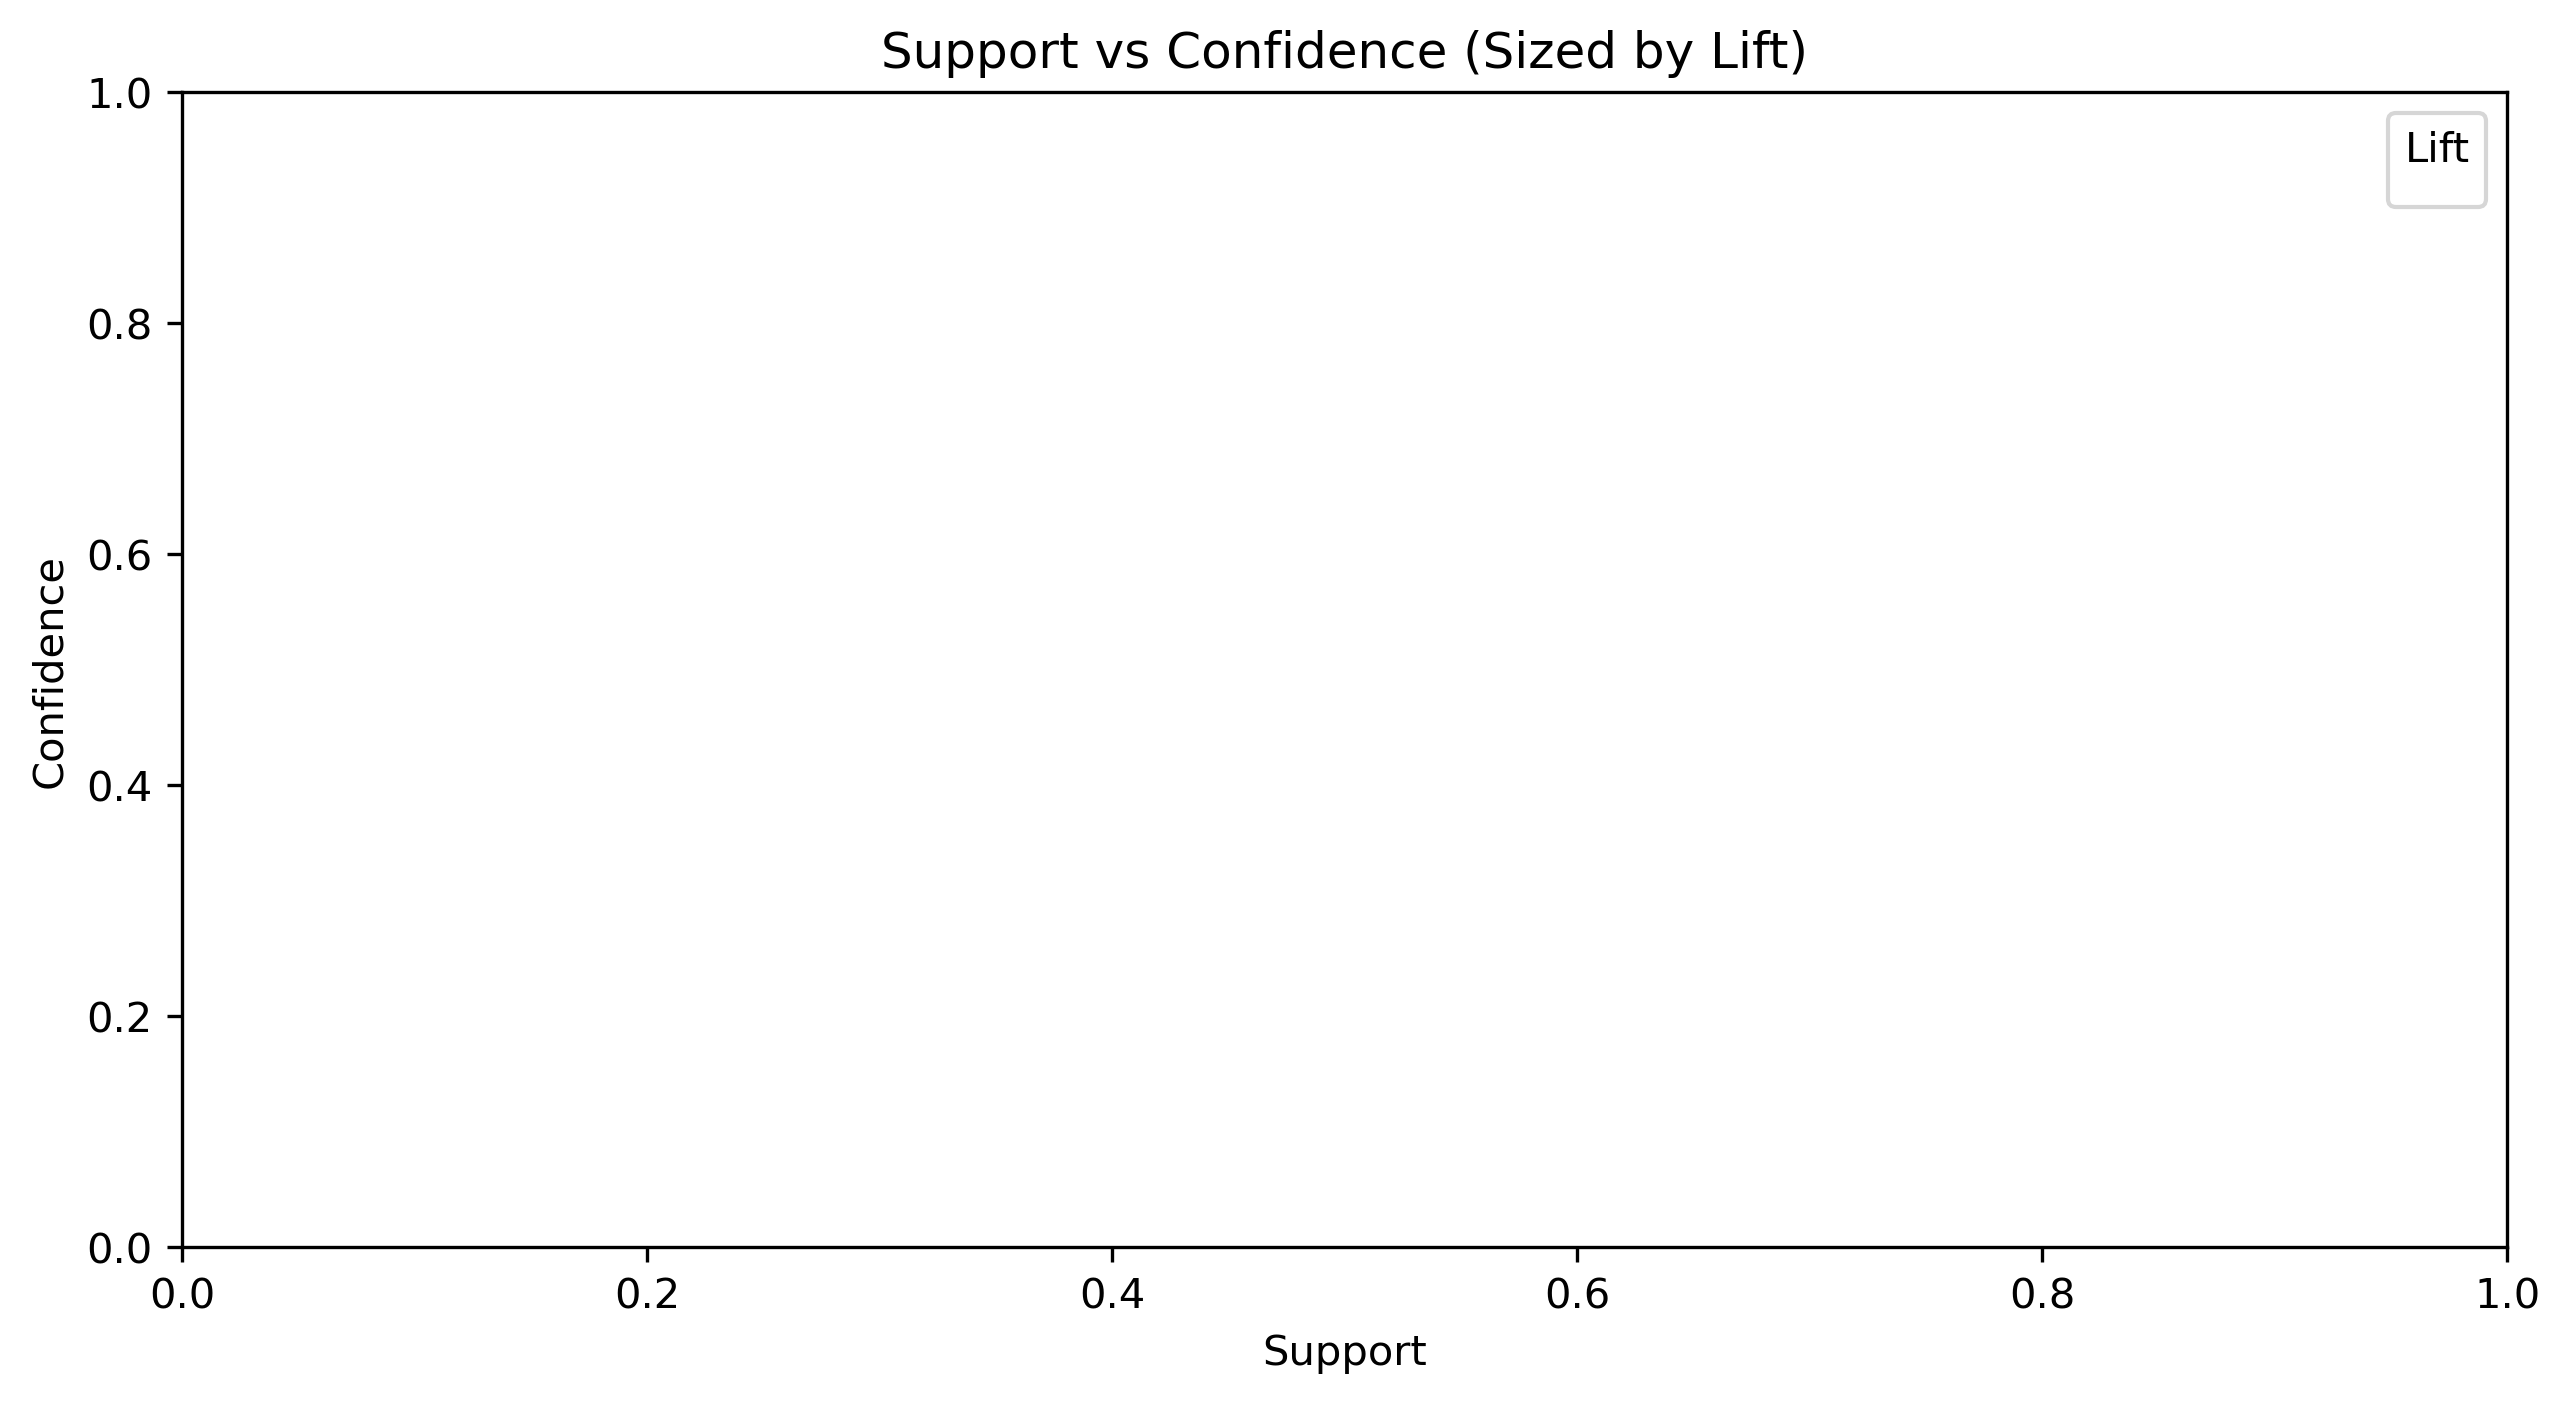

In [23]:
sns.scatterplot(data=rules, x='support', y='confidence', size='lift', hue='lift', palette='viridis')
plt.title('Support vs Confidence (Sized by Lift)')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.legend(title='Lift')
plt.show()


# Interview Questions

In [ ]:
#1.	What is lift and why is it important in Association rules?


#Lift is a measure that evaluates the strength of an association rule.
#It quantifies how much more likely the items in the rule are to occur together than if they were independent of each other.

#Lift = Confidence of the rule /Support of the consequent
​
# importance
#Identifies Strong Associations: Helps prioritize rules that tell meaningful relationships.
#Avoids Trivial Rules: Filters out rules that are frequent but not informative.
#Improves Decision-Making: Provides actionable insights by highlighting statistically significant relationships.


In [ ]:
#2.	What is support and Confidence. How do you calculate them?

# support : The proportion of transactions in the dataset that contain a particular itemset.
#Measures how frequently an itemset occurs, helping to eliminate infrequent rules.
# support = no. of transaction containing itemset / total no. of transaction

# confidence : The likelihood that the consequent is present in transactions that contain the antecedent.
#Indicates the reliability of the rule by measuring how often the rule holds true.
# confidence = supoort(A U B) / support(A)



In [ ]:
#3.	What are some limitations or challenges of Association rules mining?


# Scalability:Large datasets with many items can result in an exponential number of potential itemsets and rules, making computation expensive.

# Choosing Thresholds:Setting appropriate minimum support and confidence thresholds is tricky 
#Too high may miss interesting rules, while too low may generate irrelevant ones.

# Sparsity of Data: In sparse datasets, many item combinations occur infrequently, leading to fewer rules or rules that are not statistically significant.